### A Decade of US Trade Deficits: Year-to-Date Comparison (October 2013 to 2023)
#### **What is the US Trade Deficit between imports and exports?**

In [1]:
import requests
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
api_key = os.getenv('CENSUS_API_KEY')

In [3]:
# Get Import and Export data for 2013-2023 YTD October

base_url = 'https://api.census.gov/data/timeseries/intltrade/'

export_dfs = []
import_dfs = []

for yr in range(2013, 2024):
        
    try:
        exports = requests.get(f'{base_url}exports/porths?get=ALL_VAL_YR&time={yr}-10&key={api_key}')
        df = pd.DataFrame(exports.json())
        export_dfs.append(df.iloc[1:])

        imports = requests.get(f'{base_url}imports/porths?get=GEN_VAL_YR&time={yr}-10&key={api_key}')
        df = pd.DataFrame(imports.json())
        import_dfs.append(df.iloc[1:])

    except: continue
    
exports_df = pd.concat(export_dfs)
imports_df = pd.concat(import_dfs)

display(exports_df.head())
display(imports_df.head())

,0,1
1,1310401091206,2013-10
1,1353429059251,2014-10
1,1262675541595,2015-10
1,1201846097537,2016-10
1,1275350376963,2017-10


,0,1
1,1896906198370,2013-10
1,1969669904087,2014-10
1,1886869870454,2015-10
1,1811912756358,2016-10
1,1931766287169,2017-10


In [4]:
# Set columns
cols = ['value', 'date']
exports_df.columns = cols
imports_df.columns = cols

display(exports_df.tail())
display(imports_df.tail())

,value,date
1,1373347658085,2019-10
1,1170132185391,2020-10
1,1441956464091,2021-10
1,1726121740253,2022-10
1,1685641685930,2023-10


,value,date
1,2090847658517,2019-10
1,1904147115684,2020-10
1,2312367548006,2021-10
1,2733732286484,2022-10
1,2580671322262,2023-10


In [5]:
# Merge DataFrames on 'date'
merged_df = pd.merge(exports_df, imports_df, on='date', suffixes=('_exports', '_imports'))


# Convert date to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Cast to float
merged_df['exports'] = merged_df['value_exports'].astype(float)
merged_df['imports'] = merged_df['value_imports'].astype(float)
merged_df.drop(columns=['value_exports', 'value_imports'], inplace=True)

merged_df.head()

,date,exports,imports
0,2013-10-01,1.310401e+12,1.896906e+12
1,2014-10-01,1.353429e+12,1.969670e+12
2,2015-10-01,1.262676e+12,1.886870e+12
3,2016-10-01,1.201846e+12,1.811913e+12
4,2017-10-01,1.275350e+12,1.931766e+12


In [6]:
# Calculate deficit
merged_df['deficit'] = abs(merged_df['imports'] - merged_df['exports'])

merged_df.head()

,date,exports,imports,deficit
0,2013-10-01,1.310401e+12,1.896906e+12,5.865051e+11
1,2014-10-01,1.353429e+12,1.969670e+12,6.162408e+11
2,2015-10-01,1.262676e+12,1.886870e+12,6.241943e+11
3,2016-10-01,1.201846e+12,1.811913e+12,6.100667e+11
4,2017-10-01,1.275350e+12,1.931766e+12,6.564159e+11


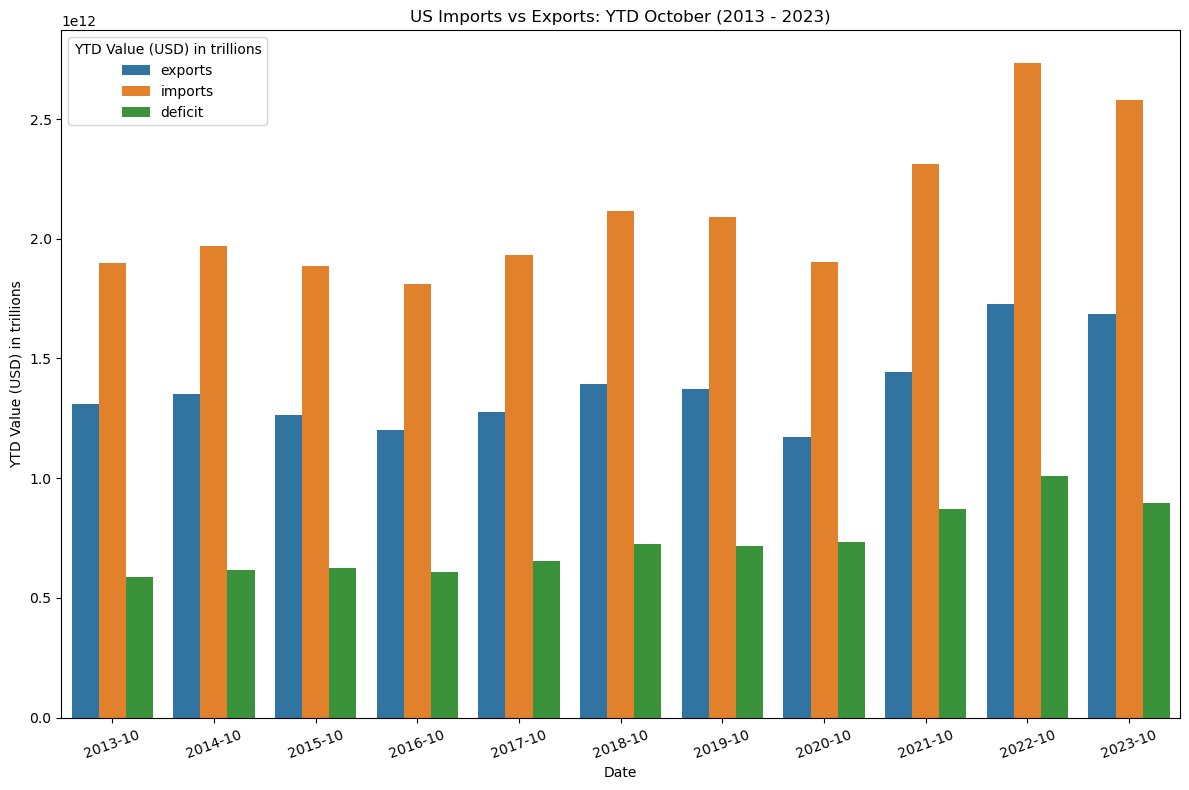

In [7]:
# Melt the DataFrame to long format for Seaborn plotting
df_melted = merged_df.melt(id_vars='date', var_name='Transaction Type', value_name='value')
df_melted['date'] = df_melted['date'].dt.to_period('M')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_melted, 
    x='date', 
    y='value', 
    hue='Transaction Type'
)
plt.xlabel('Date')
plt.ylabel('YTD Value (USD) in trillions')
plt.title('US Imports vs Exports: YTD October (2013 - 2023)')
plt.legend(title='YTD Value (USD) in trillions')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [8]:
# Format the USD total
def format_dollar(n):
    scales = ['', 'thousand', 'million', 'billion', 'trillion', 'quadrillion', 'quintillion']

    scale_index = 0
    while abs(n) >= 1000 and scale_index < len(scales) - 1:
        n /= 1000.0
        scale_index += 1

    return f"${n:.2f} {scales[scale_index]}"

In [9]:
deficits = merged_df['deficit'].tolist()
deficits_formatted = list(map(lambda n: format_dollar(n), deficits))

deficits_formatted

['$586.51 billion',
 '$616.24 billion',
 '$624.19 billion',
 '$610.07 billion',
 '$656.42 billion',
 '$723.50 billion',
 '$717.50 billion',
 '$734.01 billion',
 '$870.41 billion',
 '$1.01 trillion',
 '$895.03 billion']

#### **What is the US Trade Deficit between imports and exports?**


October 2023 YTD, $895.03 billion

**Other stats looking at a decade of deficis**

In [10]:
# Calculate some metrics
average_deficit = merged_df['deficit'].mean()
max_deficit = merged_df['deficit'].max()
min_deficit = merged_df['deficit'].min()
std_deficit = merged_df['deficit'].std()

display(format_dollar(average_deficit))
display(format_dollar(max_deficit))
display(format_dollar(min_deficit))
display(format_dollar(std_deficit))

'$731.04 billion'

'$1.01 trillion'

'$586.51 billion'

'$137.38 billion'

In [11]:
# Calculate percent change by year
exports_pct_change = merged_df['exports'].pct_change()
imports_pct_change = merged_df['imports'].pct_change()
deficit_pct_change = merged_df['deficit'].pct_change()

display(exports_pct_change[1:])
display(imports_pct_change[1:])
display(deficit_pct_change[1:])

1     0.032836
2    -0.067055
3    -0.048175
4     0.061159
5     0.091914
6    -0.013805
7    -0.147971
8     0.232302
9     0.197069
10   -0.023451
Name: exports, dtype: float64

1     0.038359
2    -0.042038
3    -0.039726
4     0.066148
5     0.095409
6    -0.011922
7    -0.089294
8     0.214385
9     0.182222
10   -0.055990
Name: imports, dtype: float64

1     0.050700
2     0.012906
3    -0.022633
4     0.075974
5     0.102201
6    -0.008296
7     0.023017
8     0.185822
9     0.157626
10   -0.111731
Name: deficit, dtype: float64

In [12]:
# Calculate years where there was a decreate in exports or imports
# Were there any years with a drop in deficit, if so when?

export_decrease_count = 0
import_decrease_count = 0
deficits = []

for i in range(len(merged_df)):
    
    if i == 0: continue
    
    curr = merged_df.iloc[i]
    prev = merged_df.iloc[i-1]
    
    if curr.exports < prev.exports: 
        export_decrease_count += 1
    if curr.imports < prev.imports: 
        import_decrease_count += 1
    if curr.deficit < prev.deficit: 
        deficits.append({
            "date": curr.date.year,
            "deficit_decline": format_dollar(abs(curr.deficit - prev.deficit))
        })
    
    
display(f'Number of years exports decreased: {export_decrease_count}')
display(f'Number of years imports decreased: {import_decrease_count}')

'Number of years exports decreased: 5'

'Number of years imports decreased: 5'

In [13]:
# Create a df with the years were the deficit decreased
# deficit_decrease_yrs = merged_df[merged_df['date'].isin(deficit_dates)]
# deficit_decrease_yrs
deficits

[{'date': 2016, 'deficit_decline': '$14.13 billion'},
 {'date': 2019, 'deficit_decline': '$6.00 billion'},
 {'date': 2023, 'deficit_decline': '$112.58 billion'}]

In [14]:
# Calculate the interquartile range to identify outliers

cols = ['deficit', 'exports', 'imports']
outliers = {}

for series in cols:
    
    Q1 = merged_df[series].quantile(0.25)
    Q3 = merged_df[series].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers[series] = merged_df[(merged_df[series] < lower_bound) | (merged_df[series] > upper_bound)]

    print(f'Number of outliers for {series}: {len(outliers[series])}')

Number of outliers for deficit: 0
Number of outliers for exports: 2
Number of outliers for imports: 1


In [15]:
# Show outliers
display(print(f'Outliers for exports: \n\n {outliers["exports"][["exports", "date"]]}'))
display(print(f'Outliers for imports: \n\n {outliers["imports"][["imports", "date"]]}'))

Outliers for exports: 

          exports       date
9   1.726122e+12 2022-10-01
10  1.685642e+12 2023-10-01


None

Outliers for imports: 

         imports       date
9  2.733732e+12 2022-10-01


None